# Eric Yarger, Predictive Analysis

In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats
from scipy.stats import zscore


In [2]:
# Jupyter environment version
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.0.3
qtconsole        : 4.7.2
ipython          : 7.13.0
ipykernel        : 5.1.4
jupyter client   : 6.1.2
jupyter lab      : 1.2.6
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.4
traitlets        : 4.3.3


In [3]:
# Python Environment version
import platform
print(platform.python_version())

3.7.7


# Data Preparation

### Step 1 : Load the Data and initial visualization 

In [4]:
df = pd.read_csv('C:/Users/ericy/Desktop/medical_clean.csv')

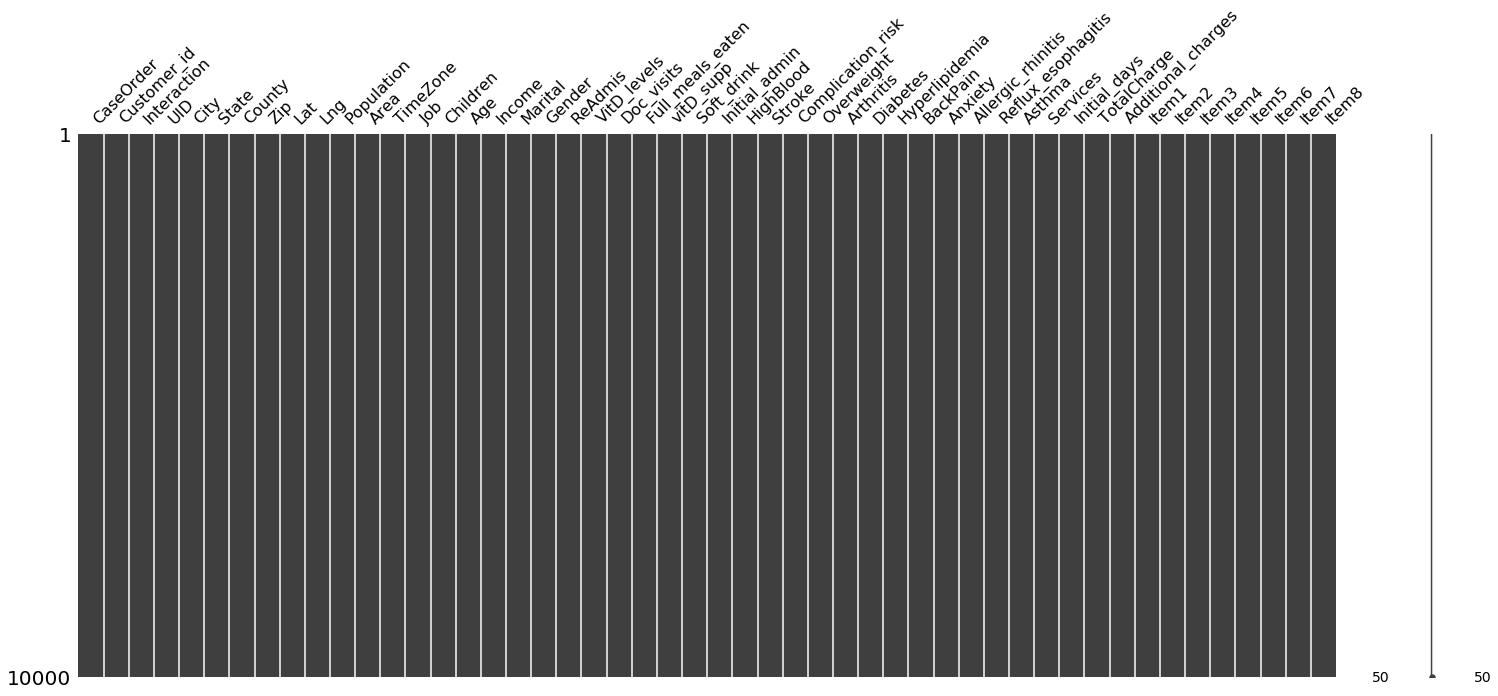

In [5]:
msno.matrix(df)

### Step 2 : Rename columns and create Pairplots

In [6]:
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat','Item3':'Timely_vis','Item4':'Reliability','Item5':'Options','Item6':'Hours','Item7':'Courteous','Item8':'Listen'},inplace=True)

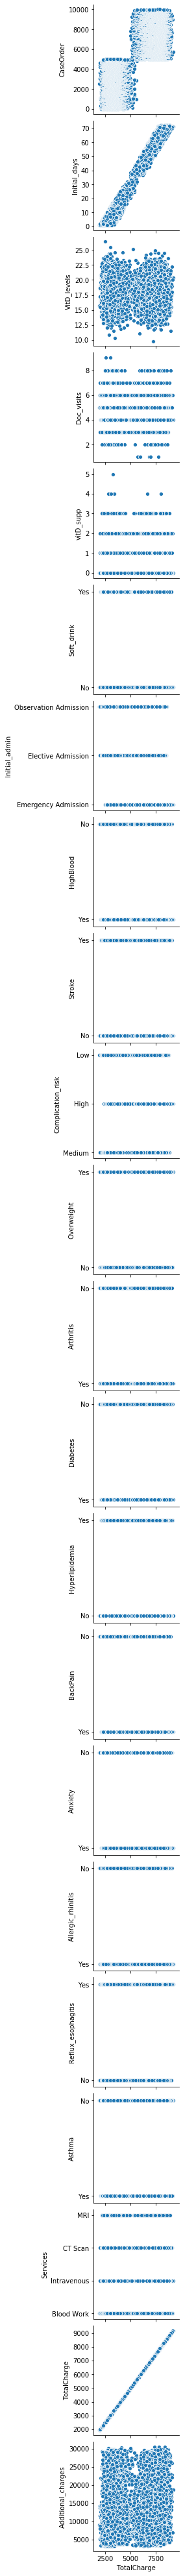

In [7]:
sns.pairplot(df, x_vars=['TotalCharge'], y_vars=['CaseOrder','Initial_days','VitD_levels','Doc_visits','vitD_supp','Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services','TotalCharge','Additional_charges'])

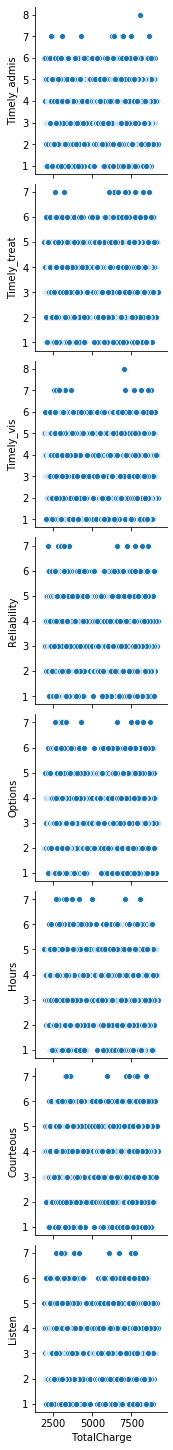

In [8]:
sns.pairplot(df, x_vars=['TotalCharge'], y_vars=['Timely_admis','Timely_treat','Timely_vis','Reliability','Options','Hours','Courteous','Listen'])

### Step 3 : Address missing data, duplicates, and outliers.


In [9]:
# Calculate Z-scores, remove Outliers Z > 3

#df.isnull().sum()

In [10]:
df.duplicated().any()

False

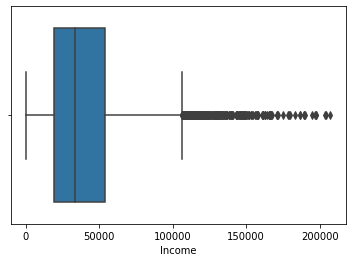

In [11]:
sns.boxplot(df['Income'])

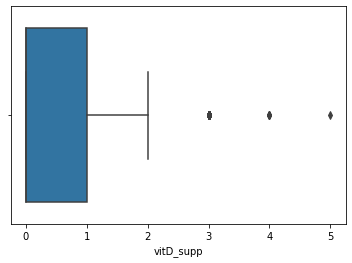

In [12]:
sns.boxplot(df['vitD_supp'])

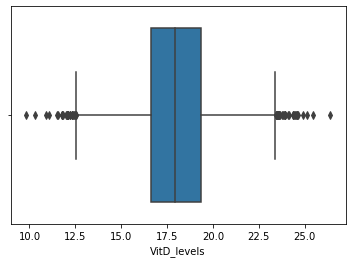

In [13]:
sns.boxplot(df['VitD_levels'])

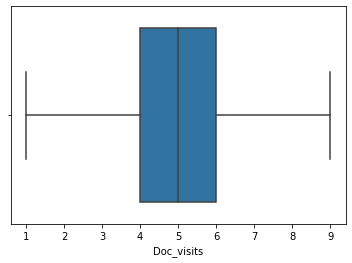

In [14]:
sns.boxplot(df['Doc_visits'])

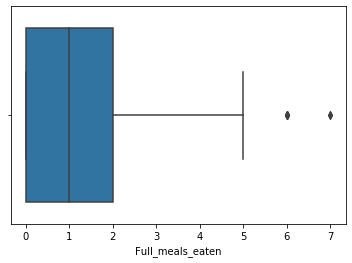

In [15]:
sns.boxplot(df['Full_meals_eaten'])

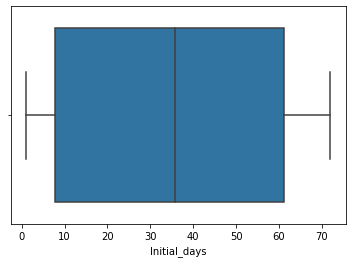

In [16]:
sns.boxplot(df['Initial_days'])

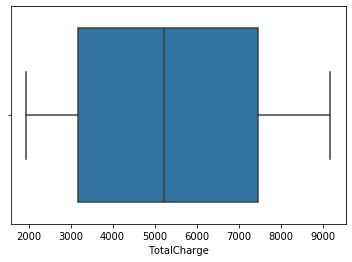

In [17]:
sns.boxplot(df['TotalCharge'])

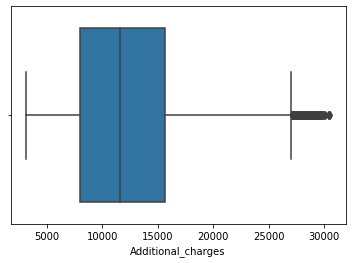

In [18]:
sns.boxplot(df['Additional_charges'])

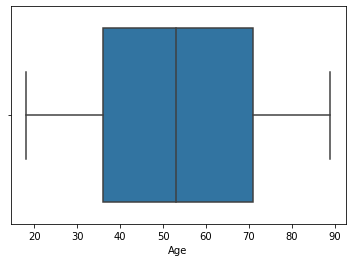

In [19]:
sns.boxplot(df['Age'])

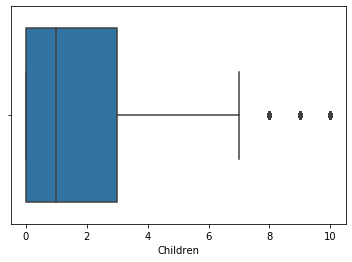

In [20]:
sns.boxplot(df['Children'])

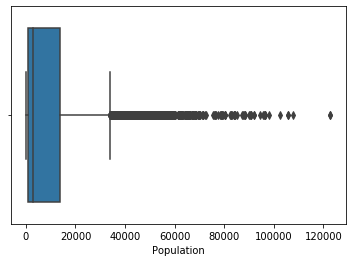

In [21]:
sns.boxplot(df['Population'])

In [22]:
# Outlier removal method via Z-score, Code reference (Bushmanov, 2019)

num_data = df.select_dtypes(include=['number'])
cat_data = df.select_dtypes(exclude=['number'])

In [23]:
idx = np.all(stats.zscore(num_data) <3, axis=1)

In [24]:
df = pd.concat([num_data.loc[idx], cat_data.loc[idx]], axis=1)

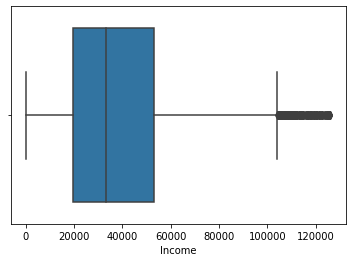

In [25]:
sns.boxplot(df['Income'])

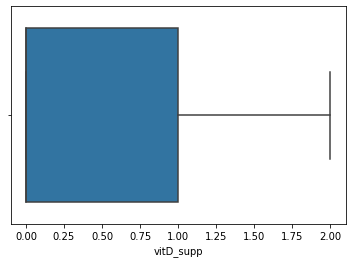

In [26]:
sns.boxplot(df['vitD_supp'])

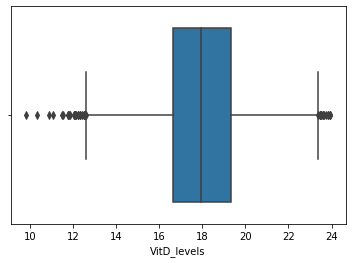

In [27]:
sns.boxplot(df['VitD_levels'])

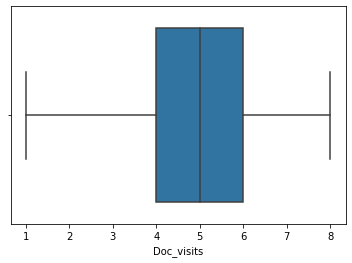

In [28]:
sns.boxplot(df['Doc_visits'])

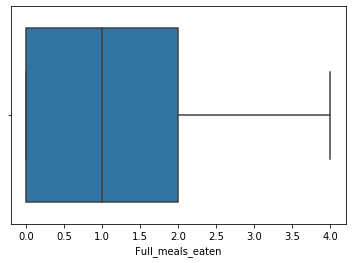

In [29]:
sns.boxplot(df['Full_meals_eaten'])

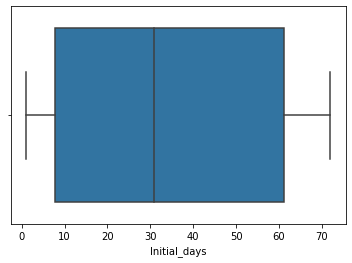

In [30]:
sns.boxplot(df['Initial_days'])

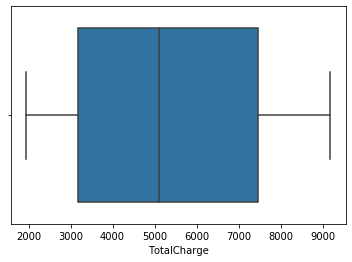

In [31]:
sns.boxplot(df['TotalCharge'])

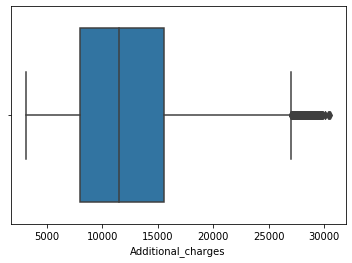

In [32]:
sns.boxplot(df['Additional_charges'])

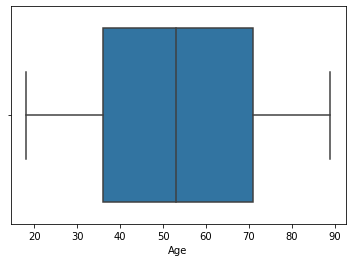

In [33]:
sns.boxplot(df['Age'])

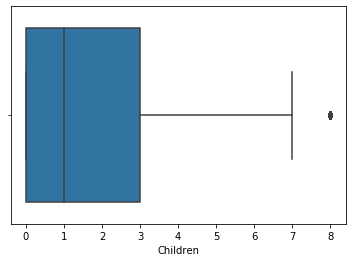

In [34]:
sns.boxplot(df['Children'])

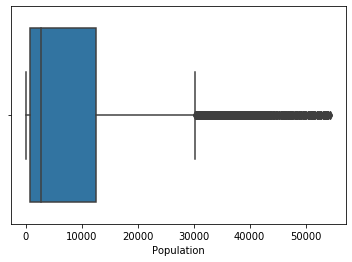

In [35]:
sns.boxplot(df['Population'])

In [36]:
# replace yes/no with 1/0 ReAdmis

df.replace(('Yes','No'), (1,0), inplace=True)

In [37]:
df.duplicated().sum()

0

### Step 4 : Look at correlation between variables

In [38]:
df.corr()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
CaseOrder,1.000000,0.010465,-0.012946,-0.012081,0.001489,0.017027,-0.003011,-0.012265,-0.015026,-0.006920,...,0.000329,-0.015372,0.008205,-0.006454,-0.006078,0.012056,0.014668,-0.001750,0.010788,-0.015245
Zip,0.010465,1.000000,-0.084258,-0.913573,0.012947,0.014307,-0.003327,0.010507,-0.010747,0.000257,...,0.004496,0.008915,0.010427,-0.009222,0.004892,-0.010125,0.007898,-0.017582,-0.002543,0.010517
Lat,-0.012946,-0.084258,1.000000,0.001062,-0.187334,0.005874,-0.000132,-0.015414,-0.005158,0.004689,...,-0.001691,-0.003979,0.011206,0.022006,-0.003521,-0.008733,0.015698,0.013252,-0.013755,0.000171
Lng,-0.012081,-0.913573,0.001062,1.000000,-0.018263,-0.014141,0.002780,-0.008175,0.000931,0.002417,...,-0.007993,-0.012112,-0.014313,0.004272,-0.004862,-0.000215,-0.012313,0.012777,0.000970,-0.006567
Population,0.001489,0.012947,-0.187334,-0.018263,1.000000,0.007810,-0.018884,0.002162,0.004719,0.016088,...,0.005435,0.007289,-0.006209,-0.009324,-0.003931,0.011799,-0.002665,0.008393,0.004870,0.002971
Children,0.017027,0.014307,0.005874,-0.014141,0.007810,1.000000,0.006050,0.003951,0.006542,-0.003467,...,-0.000677,-0.017994,0.008645,0.012099,-0.001939,-0.013339,0.002848,-0.015710,-0.007773,0.002161
Age,-0.003011,-0.003327,-0.000132,0.002780,-0.018884,0.006050,1.000000,-0.003218,0.008795,0.010819,...,0.011657,-0.009858,0.006977,0.007367,0.004963,0.026304,0.001124,0.013334,-0.018236,0.011092
Income,-0.012265,0.010507,-0.015414,-0.008175,0.002162,0.003951,-0.003218,1.000000,-0.015684,0.011179,...,0.007790,-0.018495,-0.006684,-0.010296,-0.003735,0.003499,0.003670,-0.004113,0.014447,0.013542
VitD_levels,-0.015026,-0.010747,-0.005158,0.000931,0.004719,0.006542,0.008795,-0.015684,1.000000,0.010297,...,0.002774,0.010462,0.006214,-0.024080,-0.008225,-0.008061,0.006645,-0.005865,-0.008863,0.000382
Doc_visits,-0.006920,0.000257,0.004689,0.002417,0.016088,-0.003467,0.010819,0.011179,0.010297,1.000000,...,-0.005126,0.010228,0.000778,0.012104,-0.026669,0.012149,0.002448,0.001936,-0.006894,-0.016877


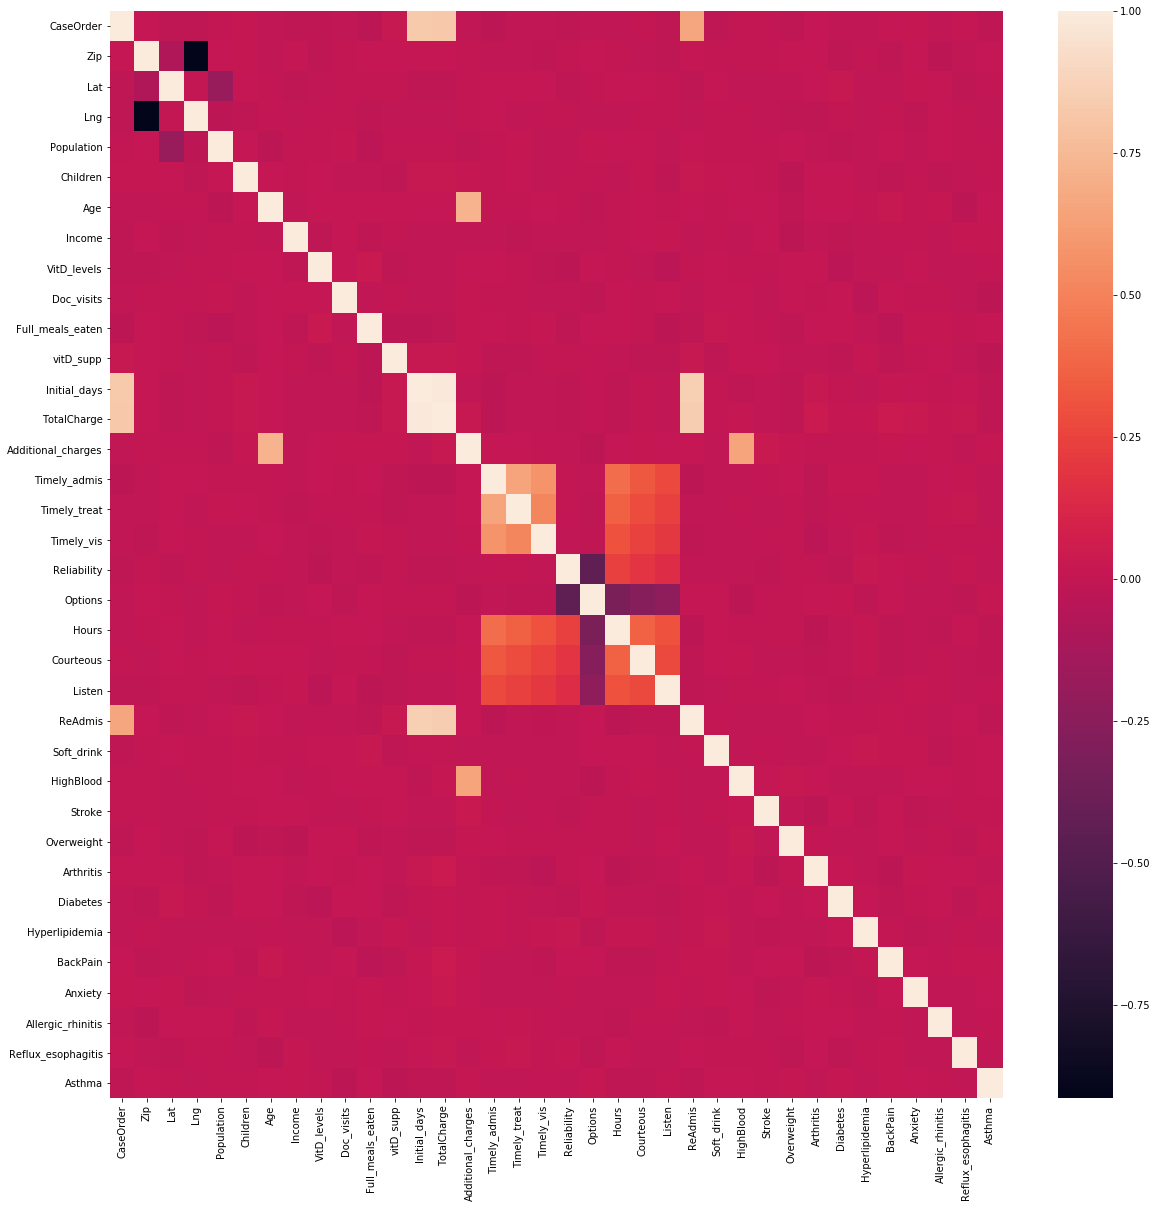

In [39]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show()

Text(0.5, 1, 'Variables correlating with TotalCharge Heatmap')

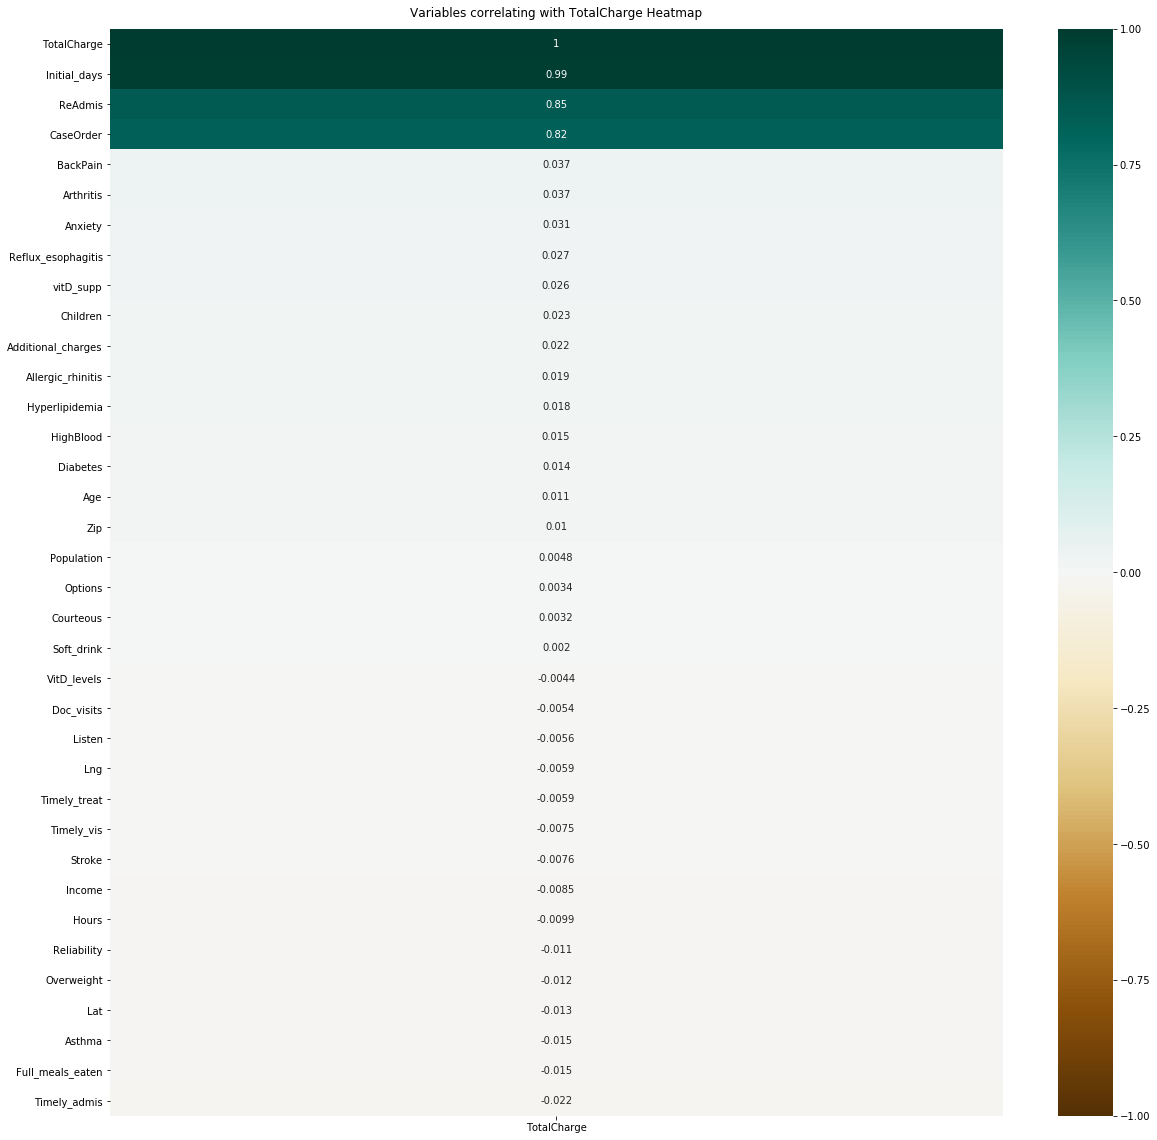

In [40]:
# Heatmap code reference (Seaborn.heatmap, n.d.)

plt.figure(figsize=(20,20))
heatmap = sns.heatmap(df.corr()[['TotalCharge']].sort_values(by='TotalCharge', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables correlating with TotalCharge Heatmap',pad=12)

### Step 5 : Create dummy variables (ensure n = k number of varibles) & rename any necessary features

In [41]:
#Get dummies code reference (Pandas.get_dummies, N.d.) 

df = pd.get_dummies(df, columns=['ReAdmis','Children','Marital','Gender','Doc_visits','vitD_supp','Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services'], drop_first=False)

In [42]:
df.rename(columns={'Services_CT Scan':'Services_CT_Scan','Marital_Never Married':'Marital_Never_Married','Initial_admin_Emergency Admission':'Initial_admin_Emergency_Admission','Initial_admin_Observation Admission':'Initial_admin_Observation_Admission','Initial_admin_Elective Admission':'Initial_admin_Elective_Admission'},inplace=True)

### Step 6 drop demographic features that won't be used in the analysis


In [43]:

df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Area','TimeZone','Job','Lng','Lat','Population'],axis=1, inplace=True)

### Step 7 select features for regression statistically - abs > .04 correlation with TotalCharge

In [44]:
abs(df.corr()["TotalCharge"][abs(df.corr()["TotalCharge"])>0.04].drop('TotalCharge')).index.tolist()

['Initial_days',
 'ReAdmis_0',
 'ReAdmis_1',
 'Initial_admin_Elective_Admission',
 'Initial_admin_Emergency_Admission',
 'Initial_admin_Observation_Admission',
 'Complication_risk_High',
 'Complication_risk_Medium']

In [45]:
df = df[['TotalCharge','Initial_days',
 'ReAdmis_0',
 'ReAdmis_1',
 'Initial_admin_Elective_Admission',
 'Initial_admin_Emergency_Admission',
 'Initial_admin_Observation_Admission',
 'Complication_risk_High',
 'Complication_risk_Medium']]
df

,TotalCharge,Initial_days,ReAdmis_0,ReAdmis_1,Initial_admin_Elective_Admission,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Complication_risk_High,Complication_risk_Medium
0,3726.702860,10.585770,1,0,0,1,0,0,1
1,4193.190458,15.129562,1,0,0,1,0,1,0
2,2434.234222,4.772177,1,0,1,0,0,0,1
3,2127.830423,1.714879,1,0,1,0,0,0,1
4,2113.073274,1.254807,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,6850.942000,51.561220,1,0,0,1,0,0,1
9996,7741.690000,68.668240,0,1,1,0,0,0,1
9997,8276.481000,70.154180,0,1,1,0,0,1,0
9998,7644.483000,63.356900,0,1,0,1,0,0,1


### Step 8 Min-Max scaling of features 

In [46]:
df = (df - df.min()) / (df.max() - df.min())
df

,TotalCharge,Initial_days,ReAdmis_0,ReAdmis_1,Initial_admin_Elective_Admission,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Complication_risk_High,Complication_risk_Medium
0,0.246933,0.135022,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.311343,0.199037,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.068475,0.053117,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.026168,0.010044,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.024130,0.003562,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.678314,0.712308,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9996,0.801304,0.953321,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9997,0.875146,0.974256,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,0.787882,0.878492,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [47]:
#Read out prepared data set for submission.

In [48]:
df.to_excel('C:/Users/ericy/Desktop/d209.1_prepared.xlsx')

### Step 9 Summary stats for selected features and TotalCharge

In [49]:
df.isnull().sum()

TotalCharge                            0
Initial_days                           0
ReAdmis_0                              0
ReAdmis_1                              0
Initial_admin_Elective_Admission       0
Initial_admin_Emergency_Admission      0
Initial_admin_Observation_Admission    0
Complication_risk_High                 0
Complication_risk_Medium               0
dtype: int64

In [50]:
df.describe()

,TotalCharge,Initial_days,ReAdmis_0,ReAdmis_1,Initial_admin_Elective_Admission,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Complication_risk_High,Complication_risk_Medium
count,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000
mean,0.465055,0.470530,0.633065,0.366935,0.250489,0.505323,0.244189,0.335108,0.452857
std,0.301177,0.370886,0.481995,0.481995,0.433318,0.499999,0.429628,0.472054,0.497800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.171211,0.096921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.436588,0.420396,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.762208,0.847510,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.corr()

,TotalCharge,Initial_days,ReAdmis_0,ReAdmis_1,Initial_admin_Elective_Admission,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Complication_risk_High,Complication_risk_Medium
TotalCharge,1.000000,0.987666,-0.845034,0.845034,-0.055349,0.107284,-0.069032,0.081082,-0.064676
Initial_days,0.987666,1.000000,-0.852064,0.852064,0.011339,-0.010895,0.001243,-0.008235,-0.006597
ReAdmis_0,-0.845034,-0.852064,1.000000,-1.000000,0.010482,-0.019393,0.011997,0.004294,-0.006905
ReAdmis_1,0.845034,0.852064,-1.000000,1.000000,-0.010482,0.019393,-0.011997,-0.004294,0.006905
Initial_admin_Elective_Admission,-0.055349,0.011339,0.010482,-0.010482,1.000000,-0.584290,-0.328595,0.022966,-0.015254
Initial_admin_Emergency_Admission,0.107284,-0.010895,-0.019393,0.019393,-0.584290,1.000000,-0.574486,0.000957,-0.007285
Initial_admin_Observation_Admission,-0.069032,0.001243,0.011997,-0.011997,-0.328595,-0.574486,1.000000,-0.024277,0.023863
Complication_risk_High,0.081082,-0.008235,0.004294,-0.004294,0.022966,0.000957,-0.024277,1.000000,-0.645872
Complication_risk_Medium,-0.064676,-0.006597,-0.006905,0.006905,-0.015254,-0.007285,0.023863,-0.645872,1.000000


In [52]:
df.mean()

TotalCharge                            0.465055
Initial_days                           0.470530
ReAdmis_0                              0.633065
ReAdmis_1                              0.366935
Initial_admin_Elective_Admission       0.250489
Initial_admin_Emergency_Admission      0.505323
Initial_admin_Observation_Admission    0.244189
Complication_risk_High                 0.335108
Complication_risk_Medium               0.452857
dtype: float64

In [53]:
df.median()

TotalCharge                            0.436588
Initial_days                           0.420396
ReAdmis_0                              1.000000
ReAdmis_1                              0.000000
Initial_admin_Elective_Admission       0.000000
Initial_admin_Emergency_Admission      1.000000
Initial_admin_Observation_Admission    0.000000
Complication_risk_High                 0.000000
Complication_risk_Medium               0.000000
dtype: float64

In [54]:
df.mode()

,TotalCharge,Initial_days,ReAdmis_0,ReAdmis_1,Initial_admin_Elective_Admission,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Complication_risk_High,Complication_risk_Medium
0,0.775589,0.935755,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.832094,0.976668,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001925FC95E88>,
      dtype=object)

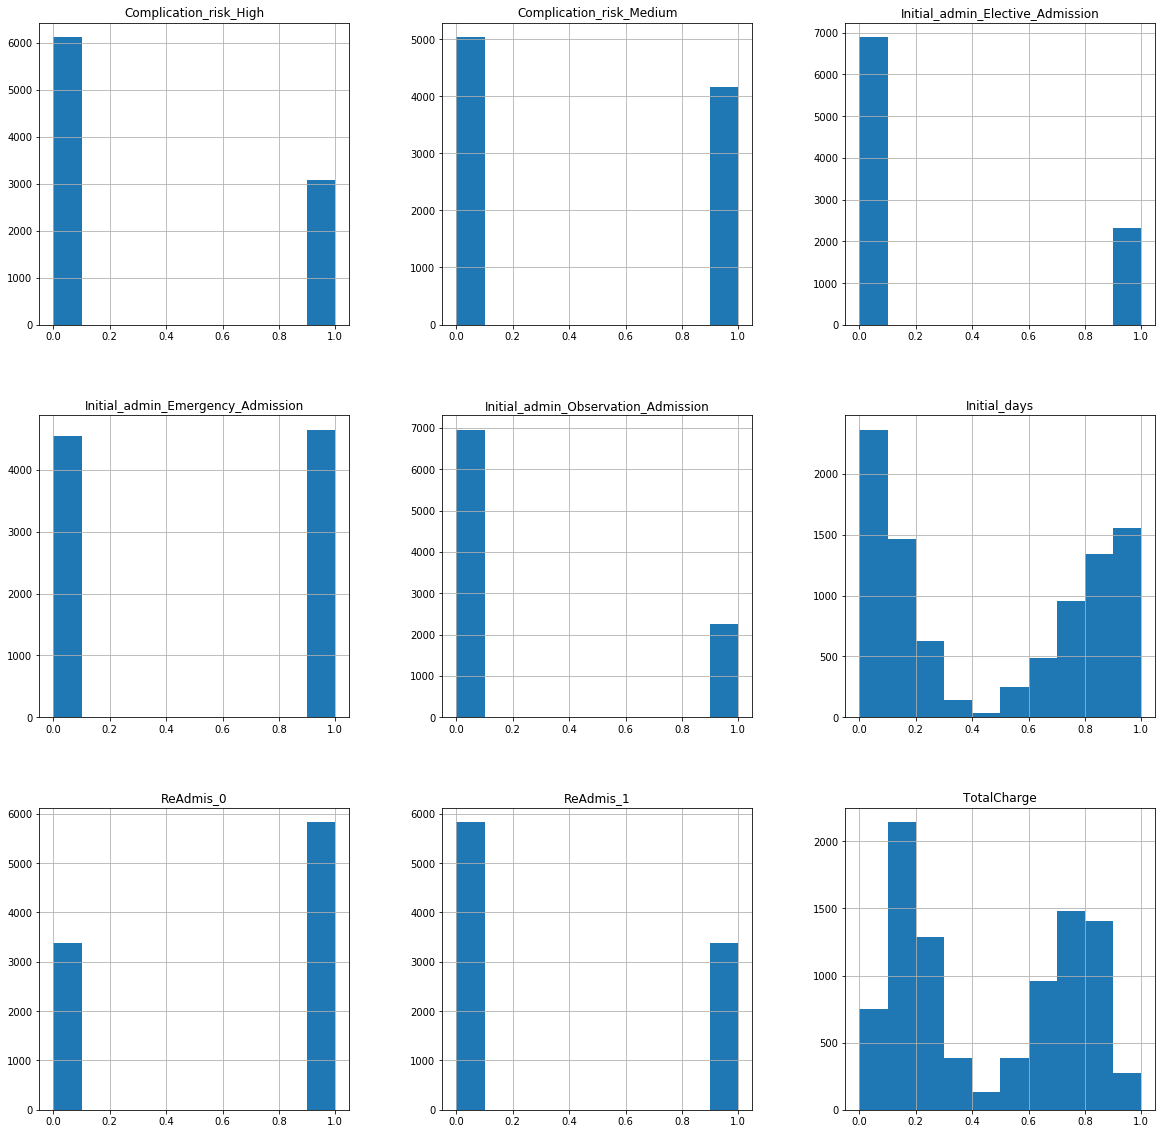

In [55]:
df.hist(figsize=(20,20))

### Step 10 .astype() categorical features to int8

In [56]:
df.astype({'ReAdmis_0': 'int8','ReAdmis_1':'int8','Initial_admin_Elective_Admission':'int8','Initial_admin_Emergency_Admission':'int8','Initial_admin_Observation_Admission':'int8','Complication_risk_High':'int8','Complication_risk_Medium':'int8'}).dtypes

TotalCharge                            float64
Initial_days                           float64
ReAdmis_0                                 int8
ReAdmis_1                                 int8
Initial_admin_Elective_Admission          int8
Initial_admin_Emergency_Admission         int8
Initial_admin_Observation_Admission       int8
Complication_risk_High                    int8
Complication_risk_Medium                  int8
dtype: object

### Step 11 Assign prepared features to y = TotalCharge, X = Prepared independent features.

In [57]:
y=df['TotalCharge']
X = df.drop(columns = 'TotalCharge')


### Step 12 import necessary libraries for Decision Tree regression analysis and cross validation 
### split data into test and train sets.

In [58]:
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE


# Section D Data Analysis

In [59]:
#Instantiate the model
# Code reference (Instantiate the model, n.d.)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, test_size = 0.30, random_state = 1)

In [60]:
X_train.to_excel('C:/Users/ericy/Desktop/d209.1.X_train.xlsx')

In [61]:
X_test.to_excel('C:/Users/ericy/Desktop/d209.1.X_test.xlsx')

In [62]:
y_train.to_excel('C:/Users/ericy/Desktop/d209.1.y_train.xlsx')

In [63]:
y_test.to_excel('C:/Users/ericy/Desktop/d209.1.y_test.xlsx')

In [64]:
#Instantiate Decision Tree

regr_1 = tree.DecisionTreeRegressor(max_depth=3, min_samples_leaf=.1,random_state=1)
regr_1.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.1, random_state=1)

In [65]:
# Predict

y_pred = regr_1.predict(X_test)


### Model Accuracy

In [66]:
# Accuracy of the model
accuracy = regr_1.score(X_test, y_test)
print(accuracy)

0.9618135955188434


In [67]:
#Read predictions and actual y values to variable

ap = pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(3000)
ap

,Predicted,Actual
5078,0.771395,0.767078
8973,0.647140,0.574817
9724,0.853578,0.774836
4849,0.108177,0.048150
5896,0.771395,0.743521
...,...,...
8514,0.647140,0.536069
1704,0.175889,0.134419
7034,0.647140,0.686924
3942,0.108177,0.039914


In [68]:
# Calculate Mean Square Error

mse_dt = MSE(y_test, y_pred)
print('MSE: {:.4f}'.format(mse_dt))

MSE: 0.0034


In [69]:
# Compute the array containing the 10-folds CV MSEs
# Code Reference (Evaluate the 10-fold CV error, n.d.)

MSE_CV_scores = - cross_val_score(regr_1, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

In [70]:
# Compute Root Mean Square Error from cross val scores

RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.4f}'.format(RMSE_CV))

CV RMSE: 0.0578


In [71]:
# Compute Root Mean Square Error from training set & predictions
# code reference (Evaluate the training error, n.d.)

# Fit dt to the training set
regr_1.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = regr_1.predict(X_train)

# Evaluate the training set RMSE of regr_1
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.4f}'.format(RMSE_train))

Train RMSE: 0.0583


[Text(0.5, 0.875, 'X[0] <= 0.491\nsquared_error = 0.091\nsamples = 6444\nvalue = 0.465'),
 Text(0.3, 0.625, 'X[0] <= 0.151\nsquared_error = 0.007\nsamples = 3232\nvalue = 0.18'),
 Text(0.2, 0.375, 'X[4] <= 0.5\nsquared_error = 0.003\nsamples = 2254\nvalue = 0.143'),
 Text(0.1, 0.125, 'squared_error = 0.002\nsamples = 1103\nvalue = 0.108'),
 Text(0.3, 0.125, 'squared_error = 0.002\nsamples = 1151\nvalue = 0.176'),
 Text(0.4, 0.375, 'squared_error = 0.005\nsamples = 978\nvalue = 0.266'),
 Text(0.7, 0.625, 'X[0] <= 0.801\nsquared_error = 0.012\nsamples = 3212\nvalue = 0.752'),
 Text(0.6, 0.375, 'squared_error = 0.006\nsamples = 1194\nvalue = 0.647'),
 Text(0.8, 0.375, 'X[0] <= 0.906\nsquared_error = 0.004\nsamples = 2018\nvalue = 0.814'),
 Text(0.7, 0.125, 'squared_error = 0.003\nsamples = 979\nvalue = 0.771'),
 Text(0.9, 0.125, 'squared_error = 0.003\nsamples = 1039\nvalue = 0.854')]

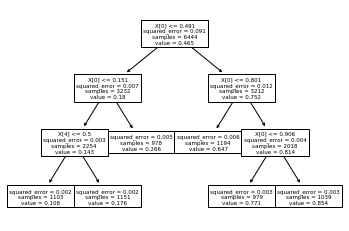

In [72]:
# Graph decision tree 
# Code reference (Galarnyk, 2022)
tree.plot_tree(regr_1)

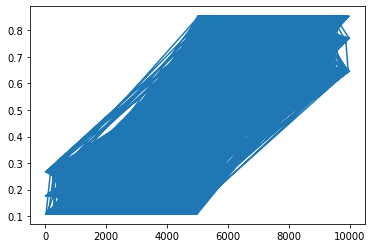

In [73]:
plt.plot(ap['Predicted'])

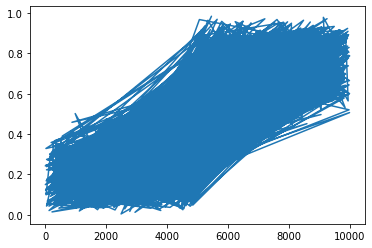

In [74]:
plt.plot(ap['Actual'])

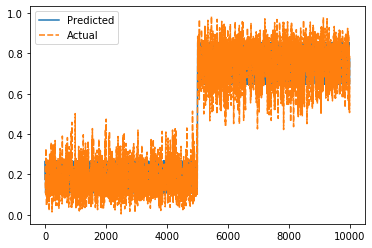

In [75]:
sns.lineplot(data=ap)

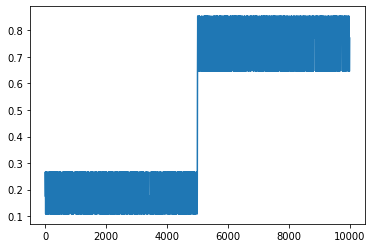

In [76]:
sns.lineplot(data=ap['Predicted'])

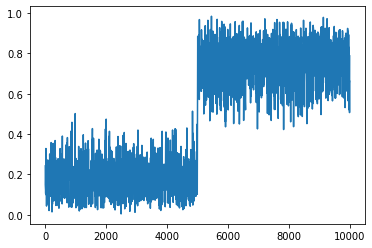

In [77]:
sns.lineplot(data=ap['Actual'])

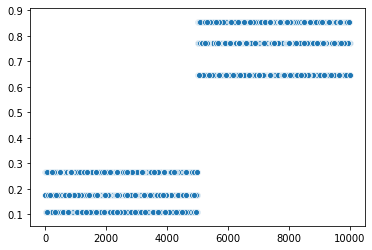

In [78]:
sns.scatterplot(data=ap['Predicted'])

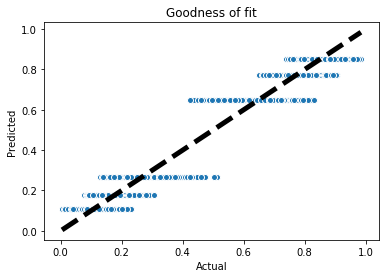

In [79]:
# Goodness of fit test, predicted vs actual

fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=5)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Goodness of fit")
plt.show()